# K Nearest Neighbors with Python

## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter
from sklearn.model_selection import train_test_split

## Load Dataset

In [ ]:
df = pd.read_csv("knn.csv")
df.head()

,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight


## Splitting Dataset

In [ ]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
X_train

array([[ 75, 169],
       [ 53, 170],
       [ 65, 172],
       [ 58, 180],
       [ 72, 175],
       [ 66, 177],
       [ 80, 180],
       [ 51, 167],
       [ 72, 180],
       [ 55, 180],
       [ 53, 163],
       [ 63, 165],
       [ 68, 162],
       [ 78, 162],
       [ 58, 169],
       [ 82, 170]])

In [ ]:
y_train

array(['Overweight', 'Underweight', 'Normal', 'Underweight', 'Overweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Underweight',
       'Normal', 'Normal', 'Overweight', 'Overweight', 'Normal',
       'Overweight'], dtype=object)

## Distance Calculation

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

## KNN

In [ ]:
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)

In [ ]:
preds = knn_predict(X_train, y_train, X_test, k=3)

In [ ]:
preds

array(['Underweight', 'Normal', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Underweight', 'Overweight', 'Underweight'],
      dtype='<U11')

In [ ]:
X_train

array([[ 75, 169],
       [ 53, 170],
       [ 65, 172],
       [ 58, 180],
       [ 72, 175],
       [ 66, 177],
       [ 80, 180],
       [ 51, 167],
       [ 72, 180],
       [ 55, 180],
       [ 53, 163],
       [ 63, 165],
       [ 68, 162],
       [ 78, 162],
       [ 58, 169],
       [ 82, 170]])

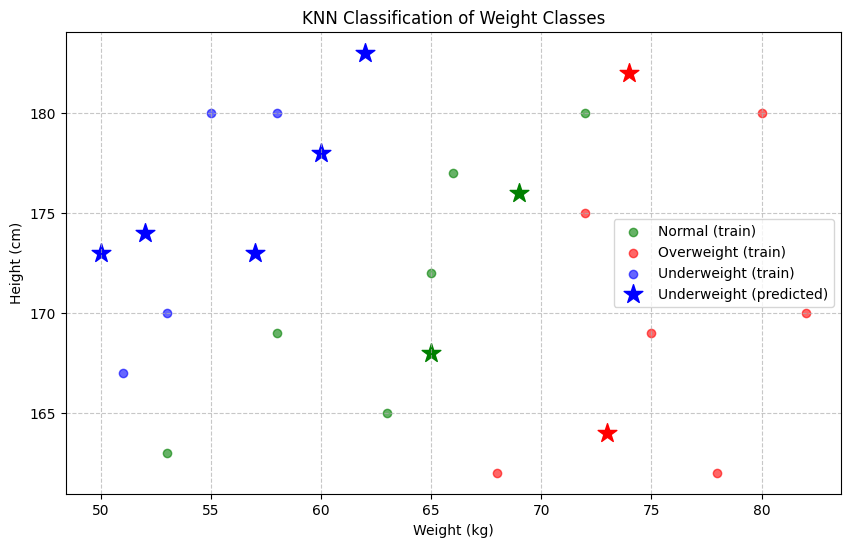

In [ ]:
plt.figure(figsize=(10, 6))

# Color mapping for classes
class_colors = {'Underweight': 'blue', 'Normal': 'green', 'Overweight': 'red'}

# Plot training data
for class_name in np.unique(y_train):
    mask = y_train == class_name
    plt.scatter(X_train[mask, 0], X_train[mask, 1],
                c=class_colors[class_name],
                label=f'{class_name} (train)',
                alpha=0.6)

# Plot test data with predictions
for i, pred in enumerate(preds):
    plt.scatter(X_test[i, 0], X_test[i, 1],
                c=class_colors[pred],
                marker='*',
                s=200,
                label=f'{pred} (predicted)' if i == 0 else "")

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('KNN Classification of Weight Classes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()